**Chapter 10 – Introduction to Artificial Neural Networks**

_This notebook contains all the sample code and solutions to the exercices in chapter 10._

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy.random as rnd
import os

# to make this notebook's output stable across runs
rnd.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Perceptrons

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

In [3]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

Saving figure perceptron_iris_plot


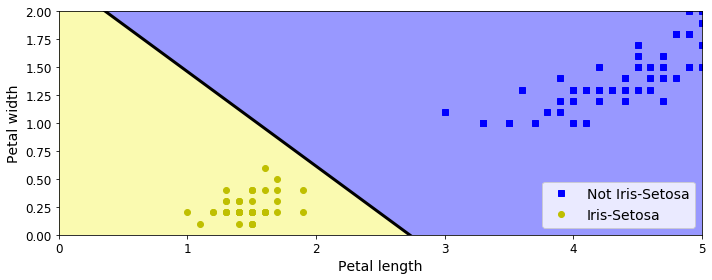

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [5]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


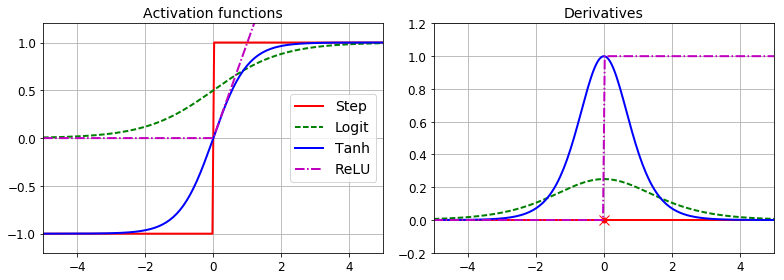

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [7]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

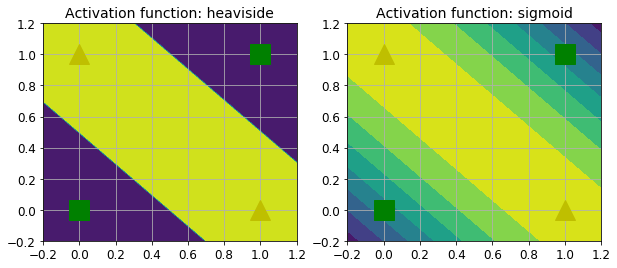

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# FNN for MNIST

## using tf.learn

In [9]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [10]:
import tensorflow as tf

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300, 100], n_classes=10,
                                         feature_columns=feature_columns)
dnn_clf.fit(x=X_train, y=y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': None, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_task_type': None, '_environment': 'local', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fe5f5f5f650>, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_num_worker_replicas': 0, '_task_id': 0, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_master': ''}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by movin

/usr/local/lib/python2.7/dist-packages/tensorflow/python/util/deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp5IuIZf/model.ckpt.
INFO:tensorflow:loss = 2.34488, step = 1
INFO:tensorflow:global_step/sec: 255.505
INFO:tensorflow:loss = 0.323739, step = 101 (0.392 sec)
INFO:tensorflow:global_step/sec: 245.044
INFO:tensorflow:loss = 0.281535, step = 201 (0.408 sec)
INFO:tensorflow:global_step/sec: 274.56
INFO:tensorflow:loss = 0.406025, step = 301 (0.364 sec)
INFO:tensorflow:global_step/sec: 252.924
INFO:tensorflow:loss = 0.249963, step = 401 (0.395 sec)
INFO:tensorflow:global_step/sec: 242.481
INFO:tensorflow:loss = 0.248108, step = 501 (0.413 sec)
INFO:tensorflow:global_step/sec: 253.564
INFO:tensorflow:loss = 0.0593232, step = 601 (0.394 sec)
INFO:tensorflow:global_step/sec: 271.479
INFO:tensorflow:loss = 0.151743, step = 701 (0.368 sec)
INFO:tensorflow:global_step/sec: 268.179
INFO:tensorflow:loss = 0.197613, step = 801 (0.373 sec)
INFO:tensorflow:global_step/sec: 277.502
INFO:tensorflow:loss = 0.108102, step = 901 (0.360 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 229.011
INFO:tensorflow:loss = 0.0428183, step = 8301 (0.437 sec)
INFO:tensorflow:global_step/sec: 269.978
INFO:tensorflow:loss = 0.00371833, step = 8401 (0.371 sec)
INFO:tensorflow:global_step/sec: 262.061
INFO:tensorflow:loss = 0.00668231, step = 8501 (0.381 sec)
INFO:tensorflow:global_step/sec: 263.674
INFO:tensorflow:loss = 0.00293888, step = 8601 (0.380 sec)
INFO:tensorflow:global_step/sec: 259.669
INFO:tensorflow:loss = 0.00246011, step = 8701 (0.385 sec)
INFO:tensorflow:global_step/sec: 262.551
INFO:tensorflow:loss = 0.012253, step = 8801 (0.381 sec)
INFO:tensorflow:global_step/sec: 268.733
INFO:tensorflow:loss = 0.00317227, step = 8901 (0.372 sec)
INFO:tensorflow:global_step/sec: 252.185
INFO:tensorflow:loss = 0.00890412, step = 9001 (0.397 sec)
INFO:tensorflow:global_step/sec: 236.006
INFO:tensorflow:loss = 0.00552503, step = 9101 (0.423 sec)
INFO:tensorflow:global_step/sec: 246.3
INFO:tensorflow:loss = 0.00374534, step = 9201 (0.406 sec)
INFO:

INFO:tensorflow:global_step/sec: 258.388
INFO:tensorflow:loss = 0.0020856, step = 16501 (0.387 sec)
INFO:tensorflow:global_step/sec: 256.58
INFO:tensorflow:loss = 0.00286917, step = 16601 (0.390 sec)
INFO:tensorflow:global_step/sec: 270.244
INFO:tensorflow:loss = 0.00196519, step = 16701 (0.370 sec)
INFO:tensorflow:global_step/sec: 284.959
INFO:tensorflow:loss = 0.00233599, step = 16801 (0.351 sec)
INFO:tensorflow:global_step/sec: 267.158
INFO:tensorflow:loss = 0.00309921, step = 16901 (0.374 sec)
INFO:tensorflow:global_step/sec: 264.398
INFO:tensorflow:loss = 0.0068281, step = 17001 (0.378 sec)
INFO:tensorflow:global_step/sec: 239.748
INFO:tensorflow:loss = 0.00188883, step = 17101 (0.417 sec)
INFO:tensorflow:global_step/sec: 245.288
INFO:tensorflow:loss = 0.00303493, step = 17201 (0.408 sec)
INFO:tensorflow:global_step/sec: 252.792
INFO:tensorflow:loss = 0.00116679, step = 17301 (0.396 sec)
INFO:tensorflow:global_step/sec: 243.365
INFO:tensorflow:loss = 0.00180978, step = 17401 (0.41

INFO:tensorflow:global_step/sec: 270.928
INFO:tensorflow:loss = 0.000524579, step = 24601 (0.369 sec)
INFO:tensorflow:global_step/sec: 272.857
INFO:tensorflow:loss = 0.000702553, step = 24701 (0.367 sec)
INFO:tensorflow:global_step/sec: 265.176
INFO:tensorflow:loss = 0.00118266, step = 24801 (0.377 sec)
INFO:tensorflow:global_step/sec: 269.343
INFO:tensorflow:loss = 0.00156498, step = 24901 (0.371 sec)
INFO:tensorflow:global_step/sec: 265.721
INFO:tensorflow:loss = 0.000324346, step = 25001 (0.376 sec)
INFO:tensorflow:global_step/sec: 274.233
INFO:tensorflow:loss = 0.000636639, step = 25101 (0.365 sec)
INFO:tensorflow:global_step/sec: 268.971
INFO:tensorflow:loss = 0.00158891, step = 25201 (0.372 sec)
INFO:tensorflow:global_step/sec: 268.13
INFO:tensorflow:loss = 0.000225484, step = 25301 (0.373 sec)
INFO:tensorflow:global_step/sec: 267.353
INFO:tensorflow:loss = 0.000618174, step = 25401 (0.374 sec)
INFO:tensorflow:global_step/sec: 275.563
INFO:tensorflow:loss = 0.000704226, step = 25

INFO:tensorflow:global_step/sec: 273.105
INFO:tensorflow:loss = 0.0010359, step = 32701 (0.366 sec)
INFO:tensorflow:global_step/sec: 276.686
INFO:tensorflow:loss = 0.00122532, step = 32801 (0.362 sec)
INFO:tensorflow:global_step/sec: 270.251
INFO:tensorflow:loss = 0.000368626, step = 32901 (0.370 sec)
INFO:tensorflow:global_step/sec: 270.294
INFO:tensorflow:loss = 0.00044226, step = 33001 (0.370 sec)
INFO:tensorflow:global_step/sec: 267.768
INFO:tensorflow:loss = 0.00164005, step = 33101 (0.373 sec)
INFO:tensorflow:global_step/sec: 275.362
INFO:tensorflow:loss = 0.000592054, step = 33201 (0.363 sec)
INFO:tensorflow:global_step/sec: 269.577
INFO:tensorflow:loss = 0.000233776, step = 33301 (0.371 sec)
INFO:tensorflow:global_step/sec: 257.521
INFO:tensorflow:loss = 0.000980824, step = 33401 (0.389 sec)
INFO:tensorflow:global_step/sec: 267.945
INFO:tensorflow:loss = 0.000279776, step = 33501 (0.373 sec)
INFO:tensorflow:global_step/sec: 267.444
INFO:tensorflow:loss = 0.000427851, step = 336

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7fe5f5f5f5d0>, 'hidden_units': [300, 100], 'feature_columns': (_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None),), 'embedding_lr_multipliers': None, 'optimizer': None, 'dropout': None, 'gradient_clip_norm': None, 'activation_fn': <function relu at 0x7fe5fa3b39b0>, 'input_layer_min_slice_size': None})

In [11]:
from sklearn.metrics import accuracy_score

y_pred = list(dnn_clf.predict(X_test))
accuracy = accuracy_score(y_test, y_pred)
accuracy

Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from /tmp/tmp5IuIZf/model.ckpt-40000


0.98219999999999996

In [12]:
from sklearn.metrics import log_loss

y_pred_proba = list(dnn_clf.predict_proba(X_test))
log_loss(y_test, y_pred_proba)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from /tmp/tmp5IuIZf/model.ckpt-40000


0.069285509407904705

In [13]:
dnn_clf.evaluate(X_test, y_test)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Starting evaluation at 2017-05-27-18:22:08
INFO

{'accuracy': 0.98220003, 'global_step': 40000, 'loss': 0.069285303}

## Using plain TensorFlow

In [14]:
import tensorflow as tf

def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 1 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="weights")
        b = tf.Variable(tf.zeros([n_neurons]), name="biases")
        Z = tf.matmul(X, W) + b
        if activation=="relu":
            return tf.nn.relu(Z)
        else:
            return Z

In [17]:
tf.reset_default_graph()

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, "hidden1", activation="relu")
    hidden2 = neuron_layer(hidden1, n_hidden2, "hidden2", activation="relu")
    logits = neuron_layer(hidden2, n_outputs, "output")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [20]:
n_epochs = 20
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            _, closs = sess.run([training_op, loss], feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        loss_test = loss.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test,
              "Train loss:", closs, "Test loss:", loss_test)
        if acc_test >= .98:
            break

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.84 Test accuracy: 0.8863 Train loss: 0.560725 Test loss: 0.420663
1 Train accuracy: 0.9 Test accuracy: 0.9125 Train loss: 0.406941 Test loss: 0.313086
2 Train accuracy: 0.88 Test accuracy: 0.9234 Train loss: 0.355559 Test loss: 0.27104
3 Train accuracy: 0.98 Test accuracy: 0.9307 Train loss: 0.167662 Test loss: 0.244759
4 Train accuracy: 0.88 Test accuracy: 0.9376 Train loss: 0.334381 Test loss: 0.222338
5 Train accuracy: 0.92 Test accuracy: 0.9388 Train loss: 0.340001 Test loss: 0.213575
6 Train accuracy: 0.98 Test accuracy: 0.9428 Train loss: 0.185078 Test loss: 0.195933
7 Train accuracy: 0.94 Test accuracy: 0.9497 Train loss: 0.163189 Test loss: 0.176292
8 Train accuracy: 0.96 Test accuracy: 0.9512 Train loss: 0.180758 Test loss: 0.16531
9 Train accuracy: 0.92 Test accuracy: 0.954 Train loss: 0.166193 Test loss: 0.157284
10 Train accuracy: 0.94 Test accuracy: 0.9558 Train loss: 0.245756 Test loss: 0.148946
11 Train accuracy: 0.98 Test accuracy: 0.9574 Train loss:

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, save_path) #"my_model_final.ckpt")
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    print(np.argmax(Z, axis=1))
    print(mnist.test.labels[:20])

In [ ]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [ ]:
show_graph(tf.get_default_graph())

## Using `dense()` instead of `neuron_layer()`

Note: the book uses `tensorflow.contrib.layers.fully_connected()` rather than `tf.layers.dense()` (which did not exist when this chapter was written). It is now preferable to use `tf.layers.dense()`, because anything in the contrib module may change or be deleted without notice. The `dense()` function is almost identical to the `fully_connected()` function, except for a few minor differences:
* several parameters are renamed: `scope` becomes `name`, `activation_fn` becomes `activation` (and similarly the `_fn` suffix is removed from other parameters such as `normalizer_fn`), `weights_initializer` becomes `kernel_initializer`, etc.
* the default `activation` is now `None` rather than `tf.nn.relu`.
* a few more differences are presented in chapter 11.

In [ ]:
tf.reset_default_graph()

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [ ]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

In [ ]:
show_graph(tf.get_default_graph())

# Exercise solutions

### 1. Draw an ANN using the original artificial neurons (like the ones in Figure 10-3) that computes A ⊕ B (where ⊕ represents the XOR operation). Hint: A ⊕ B = (A ∧ ¬ B) ∨ (¬ A ∧ B).

Edge labels indicate number of connections. E.g., '++' means two excitatory connections, '-' indicates an inverted connection, i.e., one which is excitatory when its input is off and vice versa. The node at the bolded end of an edge is the input.

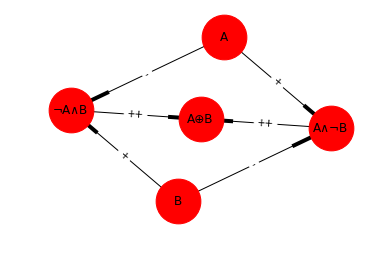

In [69]:
# NB: Requires pip package networkx
import networkx as nx
np.random.seed(0)

# create a networkx graph
G = nx.MultiDiGraph()
nodes = ['A','B', 'A∧¬B', '¬A∧B', 'A⊕B']
G.add_nodes_from(nodes)
edges = {('A', 'A∧¬B'): '+', ('A', '¬A∧B'): '-', 
         ('B', 'A∧¬B'): '-', ('B', '¬A∧B'): '+', 
         ('A∧¬B', 'A⊕B'): '++', ('¬A∧B', 'A⊕B'): '++'}
G.add_edges_from(edges.keys())

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=2000)
nx.draw_networkx_labels(G, pos, dict(zip(nodes, nodes)))
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, edges)

plt.axis('off');

### 2. Why is it generally preferable to use a Logistic Regression classifier rather than a classical Perceptron (i.e., a single layer of linear threshold units trained using the Perceptron training algorithm)? 

A Logistic Regression model is easier to train, because its output is a smooth function of its parameters. Also, it directly encodes a conditional probability model, which may be easier to reason about in some cases.

### How can you tweak a Perceptron to make it equivalent to a Logistic Regression classifier?

To make it easier to train, replace the LTU outputs with some kind of output which at least some of the time has a non-zero derivative with respect to the inputs. To encode a probability model, replace the outputs in the final layer with a softmax.

### 3. Why was the logistic activation function a key ingredient in training the first MLPs?

Non-trivial derivatives enabled effective backpropagation.

### 4. Name three popular activation functions. Can you draw them?

See the [Activation Functions section](http://localhost:8888/notebooks/10_introduction_to_artificial_neural_networks.ipynb#Activation-functions) above.

### 5. Suppose you have an MLP composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons. All artificial neurons use the ReLU activation function. 

#### What is the shape of the input matrix X? 

10x1

#### What about the shape of the hidden layer’s weight vector Wₕ, and the shape of its bias vector bₕ?

50x10, 50x1

#### What is the shape of the output layer’s weight vector Wₒ, and its bias vector bₒ?

3x50, 3x1

#### What is the shape of the network’s output matrix Y?

3x1

#### Write the equation that computes the network’s output matrix Y as a function of X, Wₕ, bₕ, Wₒ and bₒ.

ReLU(Wₒ\*ReLU(Wₕ\*X+bₕ)+bₒ)

### 6. How many neurons do you need in the output layer if you want to classify email into spam or ham? 

1

#### What activation function should you use in the output layer? 

Logistic

#### If instead you want to tackle MNIST, how many neurons do you need in the output layer, using what activation function?

10, softmax.

#### Answer the same questions for getting your network to predict housing prices as in Chapter 2.

Single float input for all fields except ocean proximity, which is a five-way one-hot encoded input.

### 7. What is backpropagation and how does it work? 

It is the chain rule, applied to numeric evaluation of the derivative of the network with respect to its parameters, at a fixed set of input value. An initial feedforward stage calculates the intermediate values for each output, given the inputs. Then, working backward through the network layers, the derivatives of the final output are computed by applying the chain rule.

#### What is the difference between backpropagation and reverse-mode autodiff?

They are the same algorithm.

### 8. Can you list all the hyperparameters you can tweak in an MLP? 

All optimization parameters (learning rate, momentum, etc.), number of layers, number of outputs in each hidden layer, activation function for each output.

#### If the MLP overfits the training data, how could you tweak these hyperparameters to try to solve the problem?

- Implicit regularization through noisy optimization procedures like stochastic gradient descent. E.g., increase the learning rate.

- Simplify the parameter space by reducing the number of layers / number of hidden outputs.

- Noise on inputs / outputs. E.g., a stochastic activation function, dropout.

### 9. Train a deep MLP on the MNIST dataset and see if you can get over 98% precision. Just like in the last exercise of Chapter 9, try adding all the bells and whistles (i.e., save checkpoints, restore the last checkpoint in case of an interruption, add summaries, plot learning curves using TensorBoard, and so on).

In this context, accuracy and precision (at least the average precision over the digit classes, weighted by their frequency) are the same value. It suffices to double the number of hidden outputs in each layer of the model defined in [Using plain TensorFlow](http://localhost:8888/notebooks/10_introduction_to_artificial_neural_networks.ipynb#Using-plain-TensorFlow) above, and let it run a bit longer.

In [100]:
from collections import namedtuple

MLPTensors = namedtuple(
    'MLP', 'X y hidden logits loss training accuracy init saver summary test_writer train_writer')

def MLP(n_inputs, n_hidden_outputs, n_outputs, learning_rate, name='MLP'):
    """Return the tensors for an MLP with the given architecture and learning rate."""
    X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
    y = tf.placeholder(tf.int64, shape=(None), name="y")

    with tf.name_scope(name + "/dnn"):
        hidden = []
        for i, n_hidden in enumerate(n_hidden_outputs):
            hidden.append(neuron_layer(X, n_hidden, "hidden1", activation="relu"))
        logits = neuron_layer(hidden[-1], n_outputs, "output")

    with tf.name_scope(name + "/loss"):
        xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
        loss = tf.reduce_mean(xentropy, name="loss")
        tf.summary.scalar('loss', loss)

    with tf.name_scope(name + "/train"):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        training_op = optimizer.minimize(loss)

    with tf.name_scope(name + "/eval"):
        correct = tf.nn.in_top_k(logits, y, 1)
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
        tf.summary.scalar('accuracy', accuracy)        
    
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
    summary = tf.summary.merge_all()
    test_writer = tf.summary.FileWriter('/tmp/mlp/test', tf.get_default_graph())
    train_writer = tf.summary.FileWriter('/tmp/mlp/train', tf.get_default_graph())
    return MLPTensors(**{'X': X, 'y': y, 'hidden': hidden, 'logits': logits,
                         'loss': loss, 'training': training_op, 'accuracy': accuracy,
                         'init': init, 'saver': saver, 'summary': summary,
                         'test_writer': test_writer, 'train_writer': train_writer})

In [106]:
tf.reset_default_graph()

mlp = MLP(28*28, [1000, 600], 10, 0.01)

In [ ]:
import glob, re

n_epochs = 2000
batch_size = 50

with tf.Session() as sess:
    mlp.init.run()
    
    # Check whether there's a checkpoint to restore from
    chkpath = '/tmp/mlp.chk'
    checkpoints = glob.glob(chkpath + '-*')
    if checkpoints:  # Restore from last checkpoint
        # Remove the suffix from the last checkpoint
        last_chk = re.sub(r'\.[^.]+$', '', max(checkpoints))
        mlp.saver.restore(sess, last_chk)

    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            train_data = {mlp.X: X_batch, mlp.y: y_batch}
            _, closs, acc_train = sess.run(
                [mlp.training, mlp.loss, mlp.accuracy], 
                feed_dict=train_data)
        summary = mlp.summary.eval(feed_dict=train_data)
        mlp.train_writer.add_summary(summary, epoch)
        mlp.train_writer.flush()
        test_data = {mlp.X: mnist.test.images, mlp.y: mnist.test.labels}
        loss_test, acc_test, summary = sess.run(
            [mlp.loss, mlp.accuracy, mlp.summary], 
            feed_dict=test_data)
        mlp.test_writer.add_summary(mlp.summary.eval(feed_dict=test_data), epoch)
        mlp.test_writer.flush()
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test,
              "Train loss:", closs, "Test loss:", loss_test)
        mlp.saver.save(sess, chkpath, global_step=epoch)
        if acc_test >= .98:
            break

    save_path = mlp.saver.save(sess, "./my_model_final.ckpt")

INFO:tensorflow:Restoring parameters from /tmp/mlp.chk-3
0 Train accuracy: 0.92 Test accuracy: 0.9261 Train loss: 0.260217 Test loss: 0.270398
1 Train accuracy: 0.98 Test accuracy: 0.9308 Train loss: 0.129181 Test loss: 0.251152
2 Train accuracy: 0.92 Test accuracy: 0.9335 Train loss: 0.194827 Test loss: 0.239045
3 Train accuracy: 0.96 Test accuracy: 0.9367 Train loss: 0.16071 Test loss: 0.228143
4 Train accuracy: 0.98 Test accuracy: 0.9388 Train loss: 0.139626 Test loss: 0.219848
5 Train accuracy: 0.94 Test accuracy: 0.9407 Train loss: 0.175978 Test loss: 0.207654
6 Train accuracy: 0.94 Test accuracy: 0.9434 Train loss: 0.219057 Test loss: 0.199423
7 Train accuracy: 0.92 Test accuracy: 0.9456 Train loss: 0.32286 Test loss: 0.190682
8 Train accuracy: 0.94 Test accuracy: 0.9478 Train loss: 0.208884 Test loss: 0.184447
9 Train accuracy: 0.98 Test accuracy: 0.9495 Train loss: 0.111148 Test loss: 0.177446
10 Train accuracy: 0.98 Test accuracy: 0.952 Train loss: 0.102998 Test loss: 0.170991

In [87]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))
    
show_graph(tf.get_default_graph())